In [114]:
import numpy as np
import pandas as pd
import twitter
import nltk
import re
import oauth2 as oauth
import tweepy
import time
import string
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sched\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sched\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Norbert Bolz is a retired German professor for Media and Communication science. In the recent years he has recieved a lot of public attention in the German mainstream media mainly through his publications on social and philosophical topics and his stance as a right conservatist. Given the importance of Bolz's tweets for his general public reception I will be scraping Bolz's 4000 most recent tweets and run some different NLP analysis on them in order to identify certain key topics and other references, which are frequently made in said tweets.

In [2]:
api_key = "E0kcW1Kx0GNc6doKP042WBVhA"
api_secret = "FlWj4g7Vtbi6UKiFDSdMeSwTNnva2mG8DWEdgCKLX8t0PDyRGl"
access_token_key = "1403330200285454340-JZnlzgjjc4TNNkGgeEgv6UnaVehKX3"
access_token_secret = "uFYlateFrodReYw8a1hjt7YyQDFMM6g5fJ273P2e6tR77"

auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token_key, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [14]:
tweets = []

def username_tweets_to_csv(username,count):
    try:      
        tweets = tweepy.Cursor(api.user_timeline,id=username).items(count)

        tweets_list = [[tweet.created_at, tweet.id, tweet.text] for tweet in tweets]

        tweets_df = pd.DataFrame(tweets_list,columns=['Datetime', 'Tweet Id', 'Text'])

        tweets_df.to_csv('{}-tweets.csv'.format(username), sep=',', index = False)

    except BaseException as e:
          print('failed on_status,',str(e))
          time.sleep(3)

In [17]:
username_tweets_to_csv("@NorbertBolz", 4000)

In [35]:
tweets_bolz = pd.read_csv("../Twitter-Analysis/@NorbertBolz-tweets.csv", sep =',')

In [148]:
stoplist_ger = nltk.corpus.stopwords.words('german')

def adding_stopwords(word):
    stoplist_ger.append(word)
    return stoplist_ger

stoplist_ger = adding_stopwords('rt')
stoplist_ger = adding_stopwords('heute')
stoplist_ger = adding_stopwords('wer')
stoplist_ger = adding_stopwords('gibt')
stoplist_ger = adding_stopwords('mehr')
stoplist_ger = adding_stopwords('the')
stoplist_ger = adding_stopwords('“')
stoplist_ger = adding_stopwords('immer')

In [149]:
def clean_text(text):
    text = text.lower()
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

clean = lambda x: clean_text(x)

tweets_clean = pd.DataFrame(tweets_bolz.Text.apply(clean))

In [150]:
tweets_clean

,Text
0,man kann freiheit nicht ohne den begriff der i...
1,wo ist marcel reif
2,rt darthputinkgb going through immigration in ...
3,das ist zwar logisch falsch aber politisch ric...
4,das grüne versprechen dass alles möglich ist w...
...,...
3240,moralfanatismus ist die bußfertigkeit der gott...
3241,gutmenschentum ist moralische selbstbefriedigu...
3242,typisch deutsch ist die frage was ist deutsch
3243,uns fehlt heute die kraft zuschauer zu bleiben


In [151]:
string_tweets = tweets_clean.to_string(header=False, index=False, index_names=False)

In [152]:
string_token = nltk.word_tokenize(string_tweets)
string_token = [w for w in string_token if not w.lower() in stoplist_ger]

In [153]:
c = Counter(string_token)
c.most_common(30)

[('maternus', 85),
 ('politik', 78),
 ('welt', 73),
 ('gut', 72),
 ('politische', 71),
 ('menschen', 69),
 ('freiheit', 62),
 ('deutschen', 59),
 ('grünen', 57),
 ('schon', 56),
 ('politischen', 56),
 ('gesellschaft', 56),
 ('merkel', 56),
 ('deutschland', 54),
 ('wäre', 51),
 ('frau', 49),
 ('linken', 48),
 ('problem', 44),
 ('spd', 43),
 ('macht', 42),
 ('leben', 41),
 ('deutsche', 40),
 ('angst', 39),
 ('medien', 39),
 ('einfach', 39),
 ('politisch', 38),
 ('rechts', 38),
 ('linke', 37),
 ('aufklärung', 36),
 ('wahrheit', 36)]

In [161]:
words = ' '.join(string_token)
wordcloud = WordCloud(width=1600, height=400).generate(words)

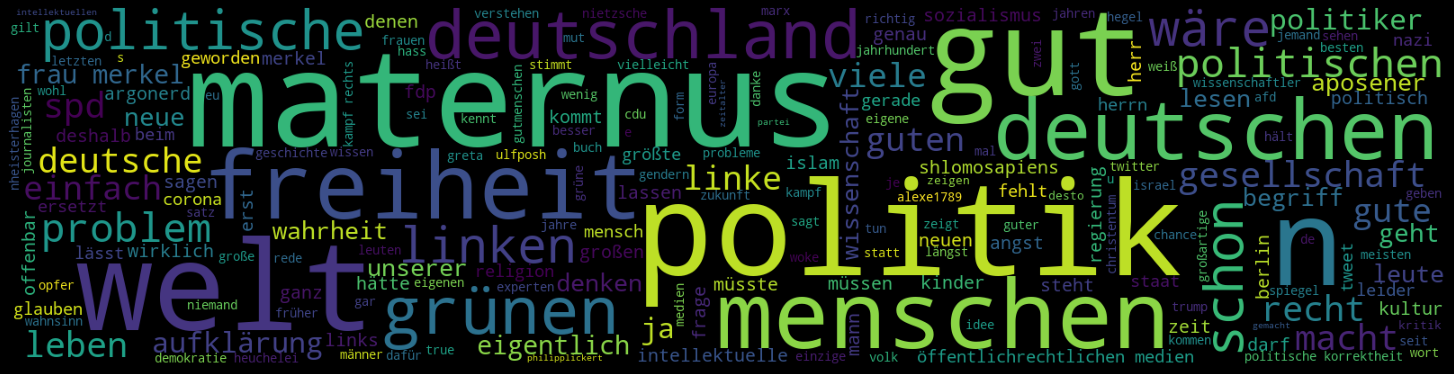

In [163]:
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()